<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,90.261660,0.000128,100.261788,100.261772,0.000015
1,0.0,1.0,56.469011,-0.000381,66.468631,66.468822,-0.000191
2,0.0,2.0,86.827630,0.000080,96.827710,96.827712,-0.000002
3,0.0,3.0,35.427819,0.000366,45.428185,45.427441,0.000744
4,0.0,4.0,66.780881,0.000211,76.781092,76.780784,0.000308
...,...,...,...,...,...,...,...
29995,999.0,25.0,66.733702,-0.000140,76.733562,76.733611,-0.000049
29996,999.0,26.0,44.711916,-0.000074,54.711843,54.711705,0.000138
29997,999.0,27.0,63.817495,0.000030,73.817524,73.817388,0.000136
29998,999.0,28.0,86.897847,-0.000175,96.897672,96.897867,-0.000195


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,90.261660,0.000128,100.261788,100.261772,0.000015
1,0.0,1.0,56.469011,-0.000381,66.468631,66.468822,-0.000191
2,0.0,2.0,86.827630,0.000080,96.827710,96.827712,-0.000002
3,0.0,3.0,35.427819,0.000366,45.428185,45.427441,0.000744
4,0.0,4.0,66.780881,0.000211,76.781092,76.780784,0.000308
...,...,...,...,...,...,...,...
29995,999.0,25.0,66.733702,-0.000140,76.733562,76.733611,-0.000049
29996,999.0,26.0,44.711916,-0.000074,54.711843,54.711705,0.000138
29997,999.0,27.0,63.817495,0.000030,73.817524,73.817388,0.000136
29998,999.0,28.0,86.897847,-0.000175,96.897672,96.897867,-0.000195


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    90.261660  0.000128  100.261788  100.261772  0.000015
      1.0    56.469011 -0.000381   66.468631   66.468822 -0.000191
      2.0    86.827630  0.000080   96.827710   96.827712 -0.000002
      3.0    35.427819  0.000366   45.428185   45.427441  0.000744
      4.0    66.780881  0.000211   76.781092   76.780784  0.000308
...                ...       ...         ...         ...       ...
999.0 25.0   66.733702 -0.000140   76.733562   76.733611 -0.000049
      26.0   44.711916 -0.000074   54.711843   54.711705  0.000138
      27.0   63.817495  0.000030   73.817524   73.817388  0.000136
      28.0   86.897847 -0.000175   96.897672   96.897867 -0.000195
      29.0   52.235510 -0.000462   62.235048   62.235339 -0.000291

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    90.261660  0.000128  100.261788  100.261772  0.000015
      1.0    56.469011 -0.000381   66.468631   66.468822 -0.000191
      2.0    86.827630  0.000080   96.827710   96.827712 -0.000002
      3.0    35.427819  0.000366   45.428185   45.427441  0.000744
      4.0    66.780881  0.000211   76.781092   76.780784  0.000308
...                ...       ...         ...         ...       ...
999.0 25.0   66.733702 -0.000140   76.733562   76.733611 -0.000049
      26.0   44.711916 -0.000074   54.711843   54.711705  0.000138
      27.0   63.817495  0.000030   73.817524   73.817388  0.000136
      28.0   86.897847 -0.000175   96.897672   96.897867 -0.000195
      29.0   52.235510 -0.000462   62.235048   62.235339 -0.000291

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,90.261660,0.000128,100.261788,100.261772,0.000015
1,0.0,1.0,56.469011,-0.000381,66.468631,66.468822,-0.000191
2,0.0,2.0,86.827630,0.000080,96.827710,96.827712,-0.000002
3,0.0,3.0,35.427819,0.000366,45.428185,45.427441,0.000744
4,0.0,4.0,66.780881,0.000211,76.781092,76.780784,0.000308
...,...,...,...,...,...,...,...
29995,999.0,25.0,66.733702,-0.000140,76.733562,76.733611,-0.000049
29996,999.0,26.0,44.711916,-0.000074,54.711843,54.711705,0.000138
29997,999.0,27.0,63.817495,0.000030,73.817524,73.817388,0.000136
29998,999.0,28.0,86.897847,-0.000175,96.897672,96.897867,-0.000195


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    90.261660  0.000128  100.261788  100.261772  0.000015
      1.0    56.469011 -0.000381   66.468631   66.468822 -0.000191
      2.0    86.827630  0.000080   96.827710   96.827712 -0.000002
      3.0    35.427819  0.000366   45.428185   45.427441  0.000744
      4.0    66.780881  0.000211   76.781092   76.780784  0.000308
...                ...       ...         ...         ...       ...
999.0 25.0   66.733702 -0.000140   76.733562   76.733611 -0.000049
      26.0   44.711916 -0.000074   54.711843   54.711705  0.000138
      27.0   63.817495  0.000030   73.817524   73.817388  0.000136
      28.0   86.897847 -0.000175   96.897672   96.897867 -0.000195
      29.0   52.235510 -0.000462   62.235048   62.235339 -0.000291

[30000 rows x 5 columns]

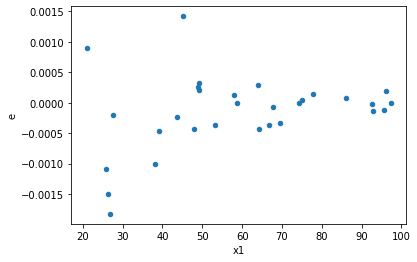

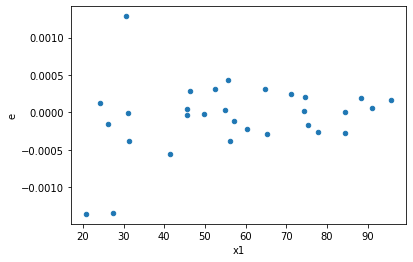

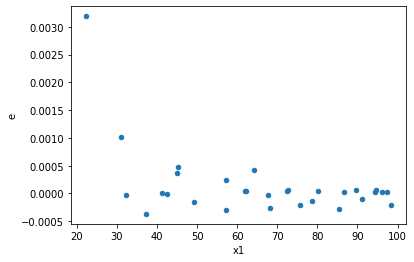

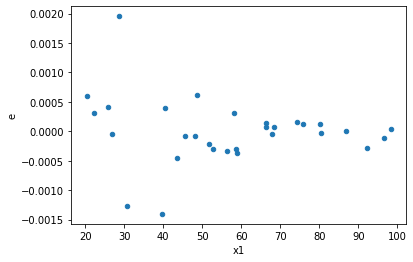

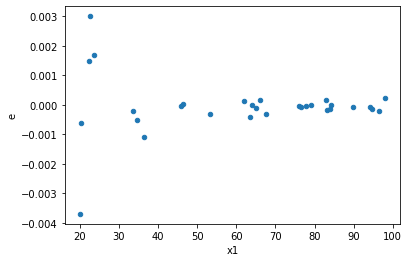

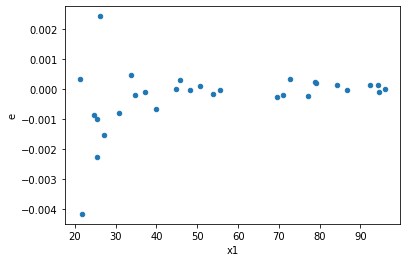

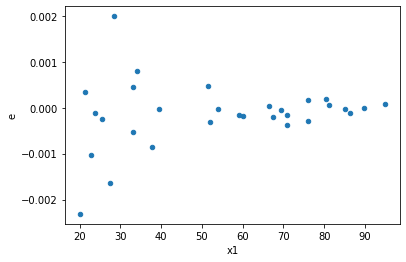

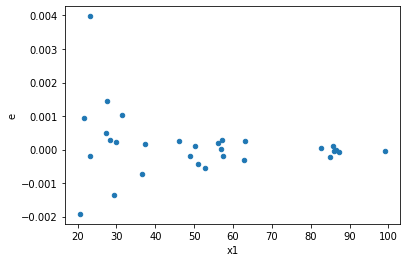

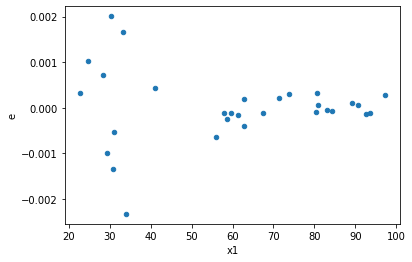

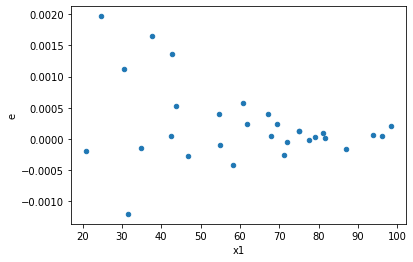

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
887.0,11.0,11.0,5.134512566526834e-07,5.758401384503336e-07,4.6677386968425764e-08,5.234910349548488e-08,1.1215088696137954,0.8525625575864231,0.5737187212067885,0.42628127879321154,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,8.761803777056955e-06,5.984739360654478e-07,7.965276160960868e-07,5.440672146049525e-08,0.06830487777329249,0.00010138006434277454,Reject005=0 : Heteroscedasticity
1.0,11.0,11.0,2.0303408935929733e-06,7.538666347999755e-08,1.845764448720885e-07,6.853333043636141e-09,0.03713005225767298,4.66754455047361e-06,Reject005=0 : Heteroscedasticity
2.0,11.0,11.0,8.594478459907098e-06,3.0673123299061765e-07,7.81316223627918e-07,2.7884657544601605e-08,0.03568933640610151,3.80329227390885e-06,Reject005=0 : Heteroscedasticity
3.0,11.0,11.0,1.497151005957509e-05,3.461789953826972e-07,1.361046369052281e-06,3.147081776206338e-08,0.02312251696757182,3.913856351326362e-07,Reject005=0 : Heteroscedasticity
4.0,11.0,11.0,5.92439244365137e-06,1.1734599541671032e-07,5.385811312410337e-07,1.0667817765155483e-08,0.01980726235353623,1.7220264271960674e-07,Reject005=0 : Heteroscedasticity
5.0,11.0,11.0,1.0779519960471477e-05,3.1530812464455545e-07,9.799563600428616e-07,2.866437496768686e-08,0.029250664760656412,1.3492029559373861e-06,Reject005=0 : Heteroscedasticity
6.0,11.0,11.0,1.5042770636492075e-05,1.5563505755001348e-07,1.3675246033174614e-06,1.414864159545577e-08,0.01034616968581973,5.277365830226785e-09,Reject005=0 : Heteroscedasticity
7.0,11.0,11.0,1.0010140287099378e-05,3.6276440226175407e-07,9.100127533726707e-07,3.297858202379582e-08,0.03623969213790826,4.116921163364075e-06,Reject005=0 : Heteroscedasticity
8.0,11.0,11.0,1.0378928340085585e-05,1.411413639857561e-07,9.435389400077805e-07,1.2831033089614191e-08,0.013598837891638458,2.3036210023422317e-08,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    994
Reject005=1 : Homoscedasticity        6
Name: Result_test, dtype: int64